Training Data:
  Region, subregion, country or area *  Location code  ISO3 Alpha-code  \
0                                WORLD            900              NaN   
1                                WORLD            900              NaN   
2                                WORLD            900              NaN   
3                                WORLD            900              NaN   
4                                WORLD            900              NaN   

   ISO2 Alpha-code  SDMX code**   Type  Year  \
0              NaN            1  World  1950   
1              NaN            1  World  1951   
2              NaN            1  World  1952   
3              NaN            1  World  1953   
4              NaN            1  World  1954   

   Total Population, as of 1 July (thousands)  \
0                                 2499322.157   
1                                 2543130.380   
2                                 2590270.899   
3                                 2640278.797   
4     

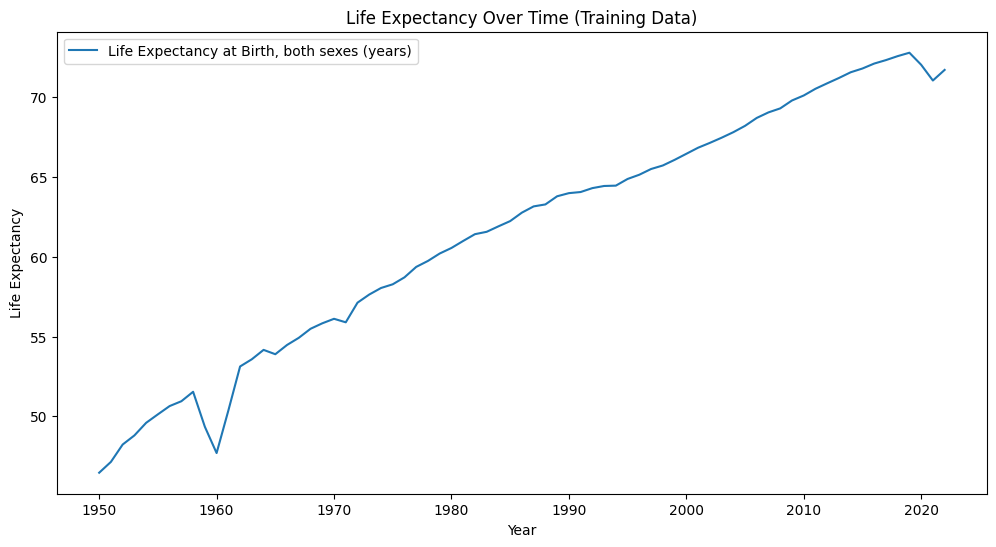

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Che

Predicted Values:
73     73.058649
74     75.241876
75     75.215482
76     74.974271
77     74.716596
         ...    
146    81.503552
147    80.783629
148    80.253948
149    79.753219
150    79.405119
Name: predicted_mean, Length: 78, dtype: float64
73     73.357
74     73.669
75     73.789
76     73.948
77     74.106
        ...  
146    81.698
147    81.787
148    81.877
149    81.969
150    82.058
Name: Life Expectancy at Birth, both sexes (years), Length: 78, dtype: float64
78
78
Mean Squared Error (MSE): 0.9943893845912203


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


TypeError: ignored

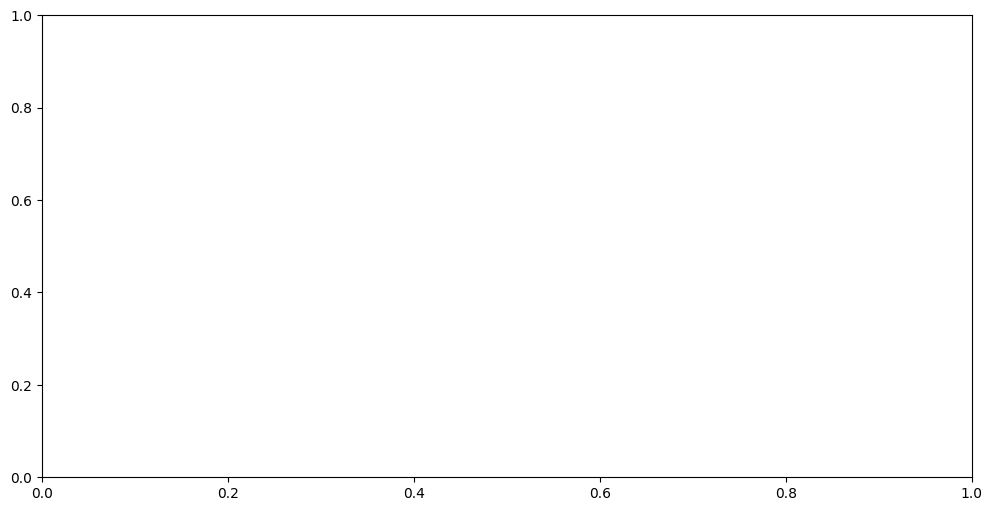

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Assuming you have a DataFrame named 'df' with columns 'year' and 'life_expectancy'
# Make sure 'year' is in datetime format
# Example DataFrame creation (replace this with your actual data loading)
df = pd.read_csv('/content/drive/MyDrive/business analytics/population_data/world.csv')

# Assuming the columns are named 'year' and 'life_expectancy'
# If not, adjust the column names accordingly

# Sample code to convert 'year' to datetime format
#df['Year'] = pd.to_datetime(df['Year'])

# Filter data up to the year 2022
df_train = df[df['Year'] <= 2022]

# Check the structure of the training DataFrame
print("Training Data:")
print(df_train.head())

# Plot the time series training data
df_train.plot(x='Year', y='Life Expectancy at Birth, both sexes (years)', figsize=(12, 6))
plt.title('Life Expectancy Over Time (Training Data)')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.show()

# Set 'year' as the index of the training DataFrame
df_train.set_index('Year', inplace=True)

# Fit ARIMA model to the training data
order = (57,2,2)  # Adjust order based on the characteristics of your data
model = ARIMA(df_train['Life Expectancy at Birth, both sexes (years)'], order=order)
results = model.fit()

# Forecast future values until 2100
forecast_steps = 2100 - 2022 # Adjust the number of steps into the future
forecast = results.get_forecast(steps=forecast_steps)

# Get forecast values and confidence intervals
forecast_mean = forecast.predicted_mean

# Print the predicted values with correct years
print("Predicted Values:")
print(forecast_mean)

# Calculate mean squared error (MSE) using actual data for the years 2023 and beyond
actual_data = df[df['Year'] > 2022]['Life Expectancy at Birth, both sexes (years)']
actual_data.head()
print(actual_data)
print(len(actual_data))
print(len(forecast_mean))
mse = mean_squared_error(actual_data, forecast_mean)

#mse = mean_squared_error(df[df['Year'] > '2022']['Life Expectancy at Birth, both sexes (years)'], forecast_mean[:-forecast_steps])
print("Mean Squared Error (MSE):", mse)

# Plot the original data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(df['Year'], df['Life Expectancy at Birth, both sexes (years)'], label='Actual')
plt.plot(forecast_mean.index, forecast_mean.values, color='red', label='Forecast')
plt.title('Life Expectancy Forecast with ARIMA')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

Training Data:
  Region, subregion, country or area *  Location code  ISO3 Alpha-code  \
0                                WORLD            900              NaN   
1                                WORLD            900              NaN   
2                                WORLD            900              NaN   
3                                WORLD            900              NaN   
4                                WORLD            900              NaN   

   ISO2 Alpha-code  SDMX code**   Type  Year  \
0              NaN            1  World  1950   
1              NaN            1  World  1951   
2              NaN            1  World  1952   
3              NaN            1  World  1953   
4              NaN            1  World  1954   

   Total Population, as of 1 July (thousands)  \
0                                 2499322.157   
1                                 2543130.380   
2                                 2590270.899   
3                                 2640278.797   
4     

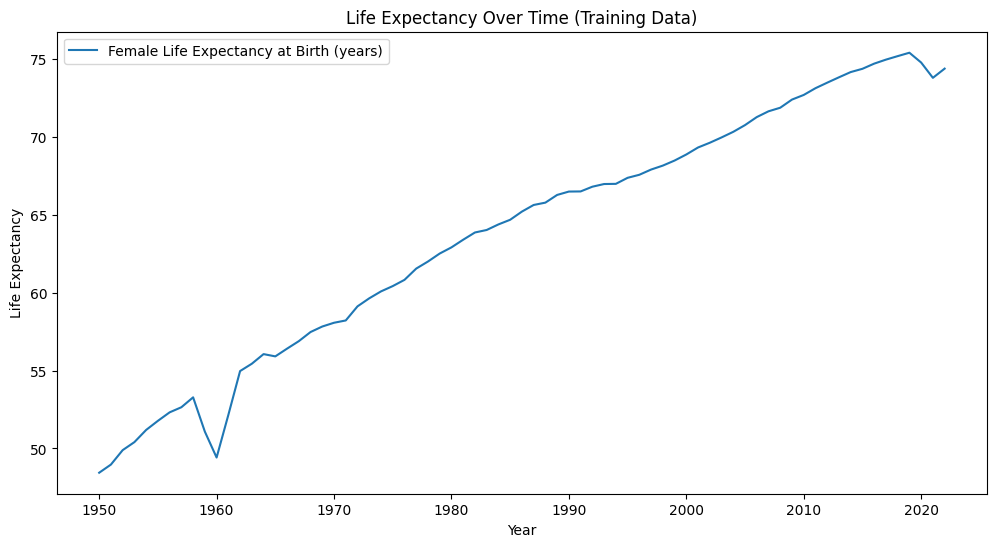

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integ

Predicted Values:
73     76.101939
74     78.318987
75     78.982219
76     77.493210
77     76.898451
         ...    
146    83.928336
147    83.070124
148    82.760906
149    83.124101
150    83.491034
Name: predicted_mean, Length: 78, dtype: float64
73     75.988
74     76.309
75     76.436
76     76.597
77     76.757
        ...  
146    83.999
147    84.081
148    84.165
149    84.252
150    84.332
Name: Female Life Expectancy at Birth (years), Length: 78, dtype: float64
78
78
Mean Squared Error (MSE): 1.1326464041999196


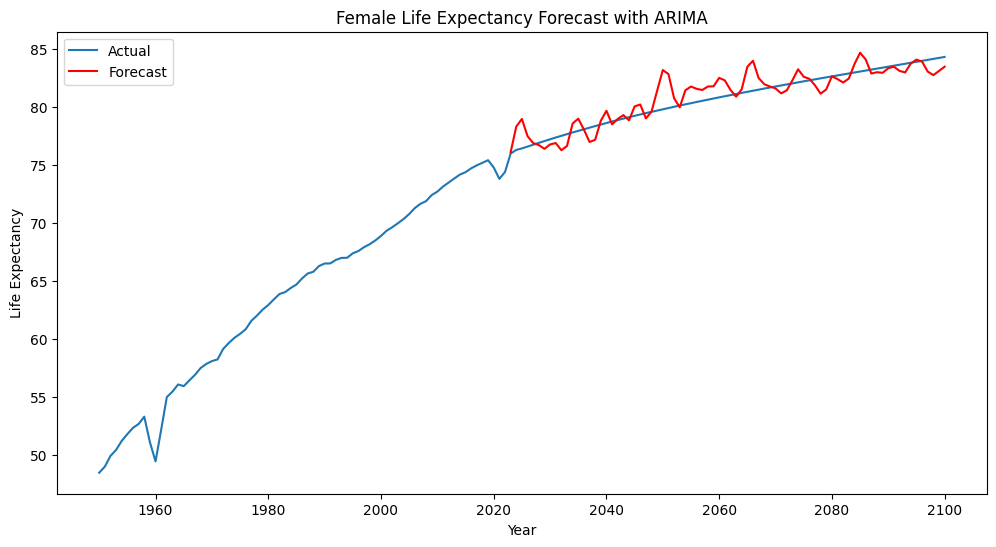

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Assuming you have a DataFrame named 'df' with columns 'year' and 'life_expectancy'
# Make sure 'year' is in datetime format
# Example DataFrame creation (replace this with your actual data loading)
df = pd.read_csv('/content/drive/MyDrive/business analytics/population_data/world.csv')

# Assuming the columns are named 'year' and 'life_expectancy'
# If not, adjust the column names accordingly

# Sample code to convert 'year' to datetime format
#df['Year'] = pd.to_datetime(df['Year'])

# Filter data up to the year 2022
df_train = df[df['Year'] <= 2022]

# Check the structure of the training DataFrame
print("Training Data:")
print(df_train.head())

# Plot the time series training data
df_train.plot(x='Year', y='Female Life Expectancy at Birth (years)', figsize=(12, 6))
plt.title('Life Expectancy Over Time (Training Data)')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.show()

# Set 'year' as the index of the training DataFrame
df_train.set_index('Year', inplace=True)

# Fit ARIMA model to the training data
order = (61,2,2)  # Adjust order based on the characteristics of your data
model = ARIMA(df_train['Female Life Expectancy at Birth (years)'], order=order)
results = model.fit()

# Forecast future values until 2100
forecast_steps = 2100 - 2022 # Adjust the number of steps into the future
forecast = results.get_forecast(steps=forecast_steps)

# Get forecast values and confidence intervals
forecast_mean = forecast.predicted_mean

# Print the predicted values with correct years
print("Predicted Values:")
print(forecast_mean)

# Calculate mean squared error (MSE) using actual data for the years 2023 and beyond
actual_data = df[df['Year'] > 2022]['Female Life Expectancy at Birth (years)']
actual_data.head()
print(actual_data)
print(len(actual_data))
print(len(forecast_mean))
mse = mean_squared_error(actual_data, forecast_mean)

#mse = mean_squared_error(df[df['Year'] > '2022']['Life Expectancy at Birth, both sexes (years)'], forecast_mean[:-forecast_steps])
print("Mean Squared Error (MSE):", mse)

# Plot the original data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(df['Year'], df['Female Life Expectancy at Birth (years)'], label='Actual')
plt.plot(df[df['Year'] > 2022]['Year'], forecast_mean.values, color='red', label='Forecast')
plt.title('Female Life Expectancy Forecast with ARIMA')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.legend()
plt.show()


Training Data:
  Region, subregion, country or area *  Location code  ISO3 Alpha-code  \
0                                WORLD            900              NaN   
1                                WORLD            900              NaN   
2                                WORLD            900              NaN   
3                                WORLD            900              NaN   
4                                WORLD            900              NaN   

   ISO2 Alpha-code  SDMX code**   Type  Year  \
0              NaN            1  World  1950   
1              NaN            1  World  1951   
2              NaN            1  World  1952   
3              NaN            1  World  1953   
4              NaN            1  World  1954   

   Total Population, as of 1 July (thousands)  \
0                                 2499322.157   
1                                 2543130.380   
2                                 2590270.899   
3                                 2640278.797   
4     

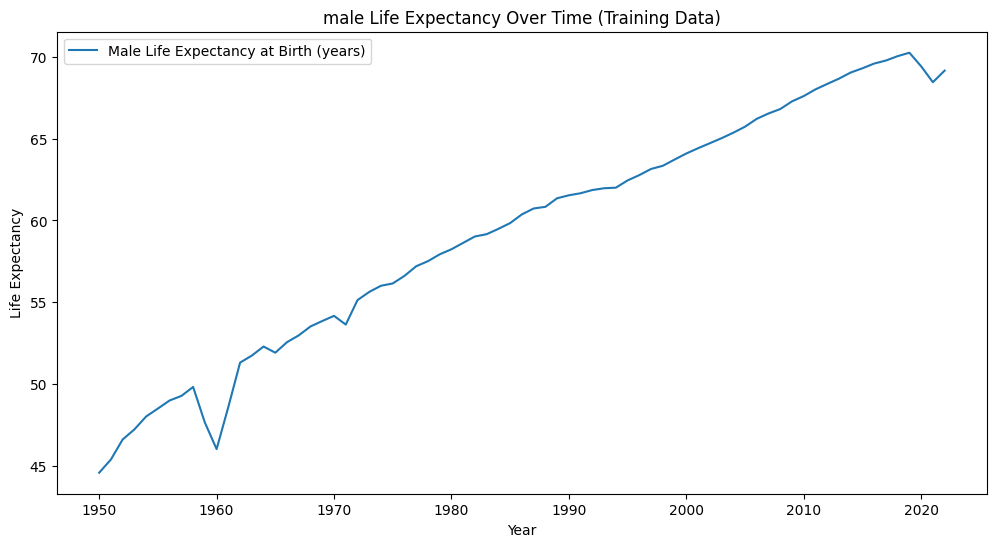

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Che

Predicted Values:
73     70.262737
74     72.437522
75     72.278229
76     72.479849
77     72.094581
         ...    
146    80.328655
147    79.140415
148    78.819420
149    79.024308
150    79.564615
Name: predicted_mean, Length: 78, dtype: float64
73     70.793
74     71.094
75     71.209
76     71.366
77     71.523
        ...  
146    79.493
147    79.587
148    79.682
149    79.778
150    79.875
Name: Male Life Expectancy at Birth (years), Length: 78, dtype: float64
78
78
Mean Squared Error (MSE): 1.1744078478550153


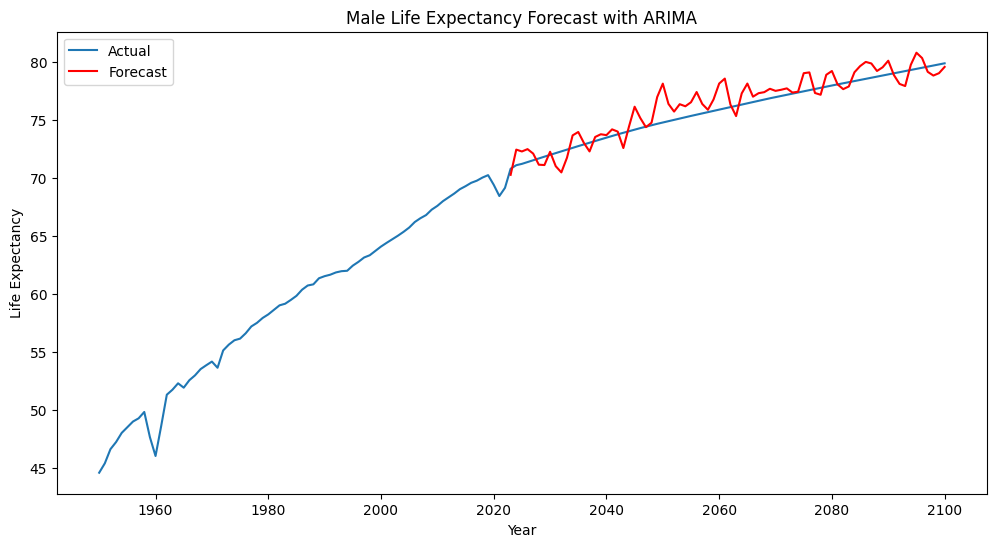

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Assuming you have a DataFrame named 'df' with columns 'year' and 'life_expectancy'
# Make sure 'year' is in datetime format
# Example DataFrame creation (replace this with your actual data loading)
df = pd.read_csv('/content/drive/MyDrive/business analytics/population_data/world.csv')

# Assuming the columns are named 'year' and 'life_expectancy'
# If not, adjust the column names accordingly

# Sample code to convert 'year' to datetime format
#df['Year'] = pd.to_datetime(df['Year'])

# Filter data up to the year 2022
df_train = df[df['Year'] <= 2022]

# Check the structure of the training DataFrame
print("Training Data:")
print(df_train.head())

# Plot the time series training data
df_train.plot(x='Year', y='Male Life Expectancy at Birth (years)', figsize=(12, 6))
plt.title('male Life Expectancy Over Time (Training Data)')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.show()

# Set 'year' as the index of the training DataFrame
df_train.set_index('Year', inplace=True)

# Fit ARIMA model to the training data
order = (58,2,2)  # Adjust order based on the characteristics of your data
model = ARIMA(df_train['Male Life Expectancy at Birth (years)'], order=order)
results = model.fit()

# Forecast future values until 2100
forecast_steps = 2100 - 2022 # Adjust the number of steps into the future
forecast = results.get_forecast(steps=forecast_steps)

# Get forecast values and confidence intervals
forecast_mean = forecast.predicted_mean

# Print the predicted values with correct years
print("Predicted Values:")
print(forecast_mean)

# Calculate mean squared error (MSE) using actual data for the years 2023 and beyond
actual_data = df[df['Year'] > 2022]['Male Life Expectancy at Birth (years)']
actual_data.head()
print(actual_data)
print(len(actual_data))
print(len(forecast_mean))
mse = mean_squared_error(actual_data, forecast_mean)

#mse = mean_squared_error(df[df['Year'] > '2022']['Life Expectancy at Birth, both sexes (years)'], forecast_mean[:-forecast_steps])
print("Mean Squared Error (MSE):", mse)

# Plot the original data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(df['Year'],df['Male Life Expectancy at Birth (years)'], label='Actual')
plt.plot(df[df['Year'] > 2022]['Year'], forecast_mean.values, color='red', label='Forecast')
plt.title('Male Life Expectancy Forecast with ARIMA')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.legend()
plt.show()


In [ ]:
!pip install statsmodels

In [ ]:
columns_list = df.columns.tolist()

# Print the list of columns
print("Columns:", columns_list)

Columns: ['Region, subregion, country or area *', 'Location code', 'ISO3 Alpha-code', 'ISO2 Alpha-code', 'SDMX code**', 'Type', 'Total Population, as of 1 July (thousands)', 'Male Population, as of 1 July (thousands)', 'Female Population, as of 1 July (thousands)', 'Population Density, as of 1 July (persons per square km)', 'Life Expectancy at Birth, both sexes (years)', 'Male Life Expectancy at Birth (years)', 'Female Life Expectancy at Birth (years)', 'Infant Mortality Rate (infant deaths per 1,000 live births)', 'Mortality between Age 15 and 60, both sexes (deaths under age 60 per 1,000 alive at age 15)']


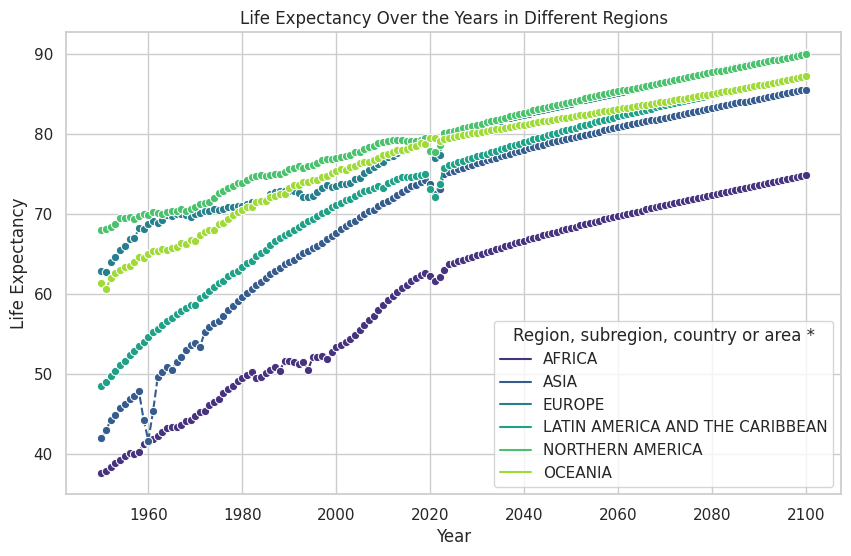

In [ ]:
import seaborn as sns
df = pd.read_csv('/content/drive/MyDrive/business analytics/population_data/region.csv')

# Set seaborn style for better aesthetics (optional)
sns.set(style="whitegrid")

# Plotting using seaborn's lineplot
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=df, x='Year', y='Life Expectancy at Birth, both sexes (years)', hue='Region, subregion, country or area *',marker='o', palette='viridis',dashes = False)
for i in range(6):
  ax.lines[i].set_linestyle("--")

# Adding labels and title
plt.title('Life Expectancy Over the Years in Different Regions')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')

# Show the plot
plt.show()

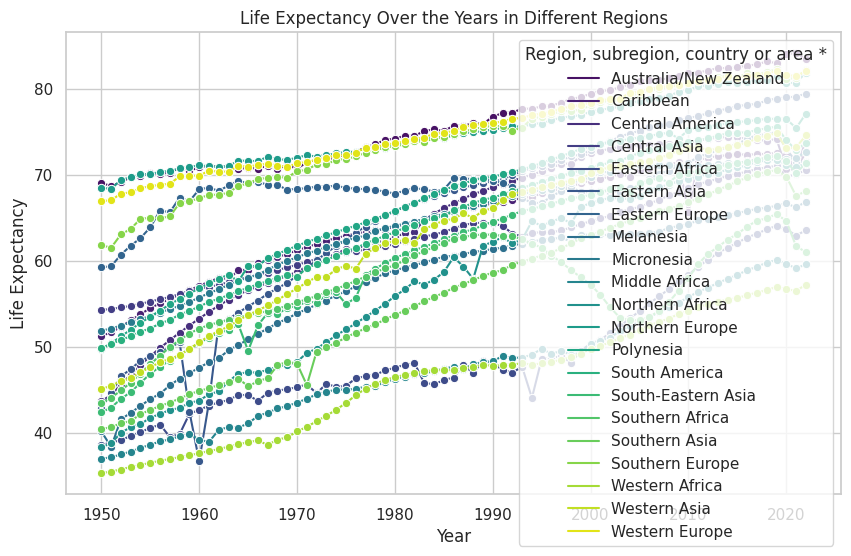

In [ ]:
import seaborn as sns
df = pd.read_csv('/content/drive/MyDrive/business analytics/population_data/subregion.csv')

# Set seaborn style for better aesthetics (optional)
df = df[df['Year'] <= 2022]

sns.set(style="whitegrid")

# Plotting using seaborn's lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Year', y='Life Expectancy at Birth, both sexes (years)', hue='Region, subregion, country or area *', marker='o', palette='viridis')

# Adding labels and title
plt.title('Life Expectancy Over the Years in Different Regions')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')

# Show the plot
plt.show()

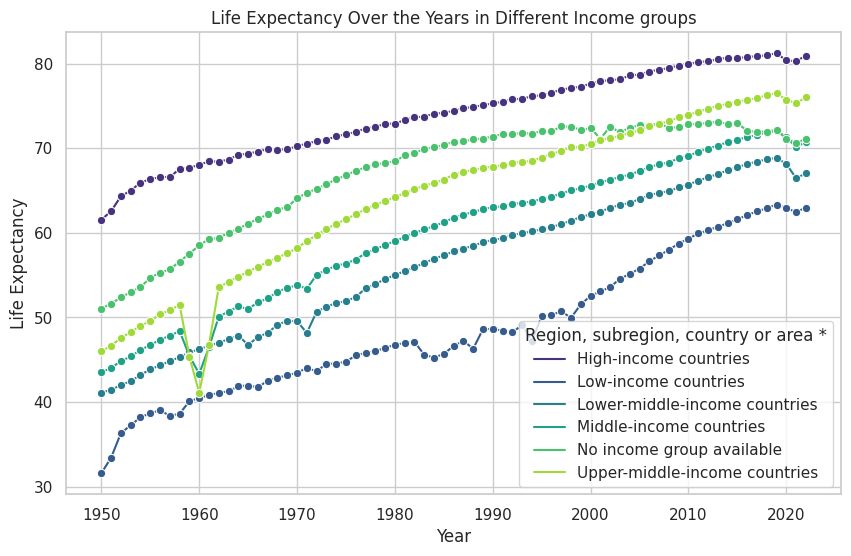

In [ ]:
import seaborn as sns
df = pd.read_csv('/content/drive/MyDrive/business analytics/population_data/income_group.csv')

# Set seaborn style for better aesthetics (optional)
df = df[df['Year'] <= 2022]

sns.set(style="whitegrid")

# Plotting using seaborn's lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Year', y='Life Expectancy at Birth, both sexes (years)', hue='Region, subregion, country or area *', marker='o', linestyle='-',palette='viridis')

# Adding labels and title
plt.title('Life Expectancy Over the Years in Different Income groups')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')

# Show the plot
plt.show()

<ipython-input-96-555c36855f04>:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df_vietnam, x='Year', y='Life Expectancy at Birth, both sexes (years)',label = 'Total', marker='o', palette='muted')
<ipython-input-96-555c36855f04>:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df_vietnam, x='Year', y='Male Life Expectancy at Birth (years)',label = 'Male', marker='o', palette='muted')
<ipython-input-96-555c36855f04>:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df_vietnam, x='Year', y='Female Life Expectancy at Birth (years)',label = 'Female', marker='o', palette='muted')


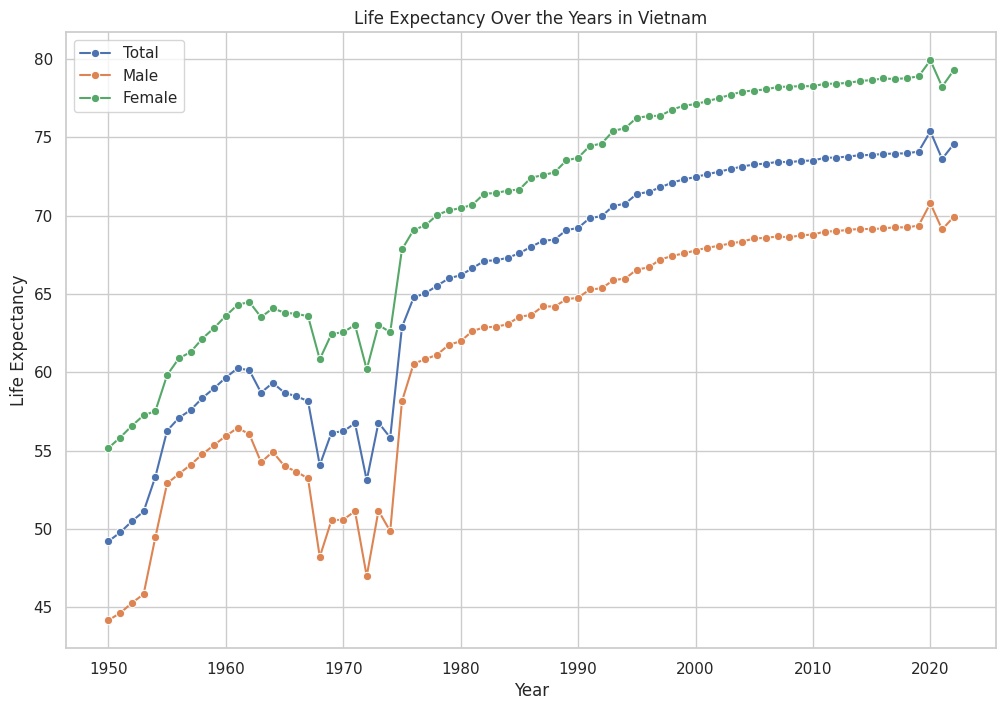

In [ ]:
import seaborn as sns
df = pd.read_csv('/content/drive/MyDrive/business analytics/population_data/country_area.csv')

# Set seaborn style for better aesthetics (optional)
df = df[df['Year'] <= 2022]
df_vietnam = df[df['Region, subregion, country or area *'] == 'Viet Nam']

sns.set(style="whitegrid")

# Plotting using seaborn's lineplot
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_vietnam, x='Year', y='Life Expectancy at Birth, both sexes (years)',label = 'Total', marker='o', palette='muted')
sns.lineplot(data=df_vietnam, x='Year', y='Male Life Expectancy at Birth (years)',label = 'Male', marker='o', palette='muted')
sns.lineplot(data=df_vietnam, x='Year', y='Female Life Expectancy at Birth (years)',label = 'Female', marker='o', palette='muted')

# Adding labels and title
plt.title('Life Expectancy Over the Years in Vietnam')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')

# Show the plot
plt.legend()
plt.show()

In [ ]:
!git clone https://github.com/NEXTSLIM/Life-Expectancy-App.git

Cloning into 'Life-Expectancy-App'...
remote: Enumerating objects: 62, done.
remote: Counting objects: 100% (62/62), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 62 (delta 28), reused 39 (delta 14), pack-reused 0
Receiving objects: 100% (62/62), 276.05 KiB | 1.33 MiB/s, done.
Resolving deltas: 100% (28/28), done.


In [ ]:
!pip install -r /content/Life-Expectancy-App/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 9.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 49.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 3.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 24.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 MB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/business analytics/integrated/integrated_data_fillna.csv")
df.columns

Index(['Country', 'location_code', 'country_code', 'Type', 'Year',
       'total_population', 'male_population', 'female_population',
       'population_density', 'life_expectancy_at_birth',
       'male_life_expectancy_at_birth', 'female_life_expectancy_at_birth',
       'infant_deaths_per_1000', 'mortality_between_15_60_per_1000', 'gdp',
       'gdp_growth', 'gdp_per_capita', 'inflation_change',
       'total_safe_water_service', 'total_safe_sanitation_service', 'Region',
       'Subregion', 'Status'],
      dtype='object')

In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 15.4 MB/s eta 0:00:00
  Using cached validators-0.22.0-py3-none-any.whl (26 kB)
  Using cached GitPython-3.1.40-py3-none-any.whl (190 kB)
  Using cached pydeck-0.8.1b0-py2.py3-none-any.whl (4.8 MB)
  Using cached watchdog-3.0.0-py3-none-manylinux2014_x86_64.whl (82 kB)
  Using cached gitdb-4.0.11-py3-none-any.whl (62 kB)
  Using cached smmap-5.0.1-py3-none-any.whl (24 kB)
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 7.0.0
    Uninstalling importlib-metadata-7.0.0:
      Successfully uninstalled importlib-metadata-7.0.0


In [ ]:
!python expectancy-app.py

2023-12-27 00:22:59.564 
  command:

    streamlit run expectancy-app.py [ARGUMENTS]
/content/drive/.shortcut-targets-by-id/17x9VkWRsi4ws7vuy2xdWBmUtT052FMUg/business analytics/expectancy-app.py:321: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [ ]:
!streamlit run expectancy-app.py




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://104.199.234.176:8501



In [ ]:
!sh /content/Life-Expectancy-App/setup.sh

In [ ]:
%cd /content/drive/MyDrive/business analytics

/content/drive/.shortcut-targets-by-id/17x9VkWRsi4ws7vuy2xdWBmUtT052FMUg/business analytics


In [ ]:
!rm -R .streamlit

rm: cannot remove '.streamlit': No such file or directory


In [ ]:
%cd ~/.streamlit

/root/.streamlit


In [ ]:
!ls

In [ ]:
!rm config.toml



rm: cannot remove 'config.toml': No such file or directory


In [ ]:
!streamlit run expectancy-app.py




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://104.199.234.176:8501

  Stopping...
  Stopping...
^C
